In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.stats as stats

In [2]:
colnames = ["Tijdstempel","programme","mlcourse","ircourse","statcourse","dbcourse","gender","chatGPT","birthday","studentestimate",
            "stand","stress","sporthours","random","bedtime","goodday1","goodday2"]
dataset = pd.read_csv("./dataset/ODI-2024.csv", skiprows=3, names=colnames)
dataset.drop("Tijdstempel", axis=1, inplace=True)
dataset["mlcourse"] = dataset["mlcourse"].astype("category")
dataset["ircourse"] = dataset["ircourse"].astype("category")
dataset["statcourse"] = dataset["statcourse"].astype("category")
dataset["gender"] = dataset["gender"].astype("category")
dataset["chatGPT"] = dataset["chatGPT"].astype("category")
dataset["stand"] = dataset["stand"].astype("category")
dataset.head()


,programme,mlcourse,ircourse,statcourse,dbcourse,gender,chatGPT,birthday,studentestimate,stand,stress,sporthours,random,bedtime,goodday1,goodday2
0,CLS,no,0,mu,nee,female,yes,3.25,300,no,10000000.0,10,360,1:00,TV shows,friends
1,Genes in Behavior and Health,no,0,mu,nee,female,yes,06/10/1994,300,no,35.0,4,47,1:00,Sports,Friends
2,AI,yes,1,mu,ja,female,not willing to say,05.04.1996,200,no,76.0,0,35,0:00,If the to do list is empty,If I have a new book
3,Business Analytics,yes,unknown,mu,nee,female,not willing to say,28/10/1997,134,no,30.0,3,5,2:00 AM,Food,Shopping
4,Master Econometrics and Data Science,yes,0,mu,ja,female,no,04/06/2002,200,no,20.0,8,3,23:30,Good food,Good company


In [3]:
def generalizeProgramme(x):
    if "bioinformatics" in x or "bisb" in x:
        return "bioinformatics and systems biology"
    if "econometrics" in x:
        return "econometrics and data science"
    if "fintech" in x:
        return "finiancial technology"
    if "computational science" in x:
        return "computational science"
    if "human language technology" in x:
        return "human language technology"
    if "business analytics" in x:
        return "business analytics"
    if "computational finance" in x:
        return "computational finance"
    if "big data" in x:
        if "engineering" in x:
            return "big data engineering"
        else:
            return "big data"
    if "political data journalism" in x:
        return "political data journalism"
    if "quantitative risk management" in x:
        return "quantitative risk management"
    if "software engineering" in x:
        return "software engineering"
    if "cls" in x:
        return "critical language scholarship"
    if " ai " in x or "artificial intelligence" in x:
        if "health" in x:
            return "ai for health"
        else:
            return "artificial intelligence"
    if " cs " in x or "computer science" in x:
        return "computer science"
    if "ba" in x:
        return "bachelor of arts"
    if "mpa" in x:
        return "public administration"
    

dataset["programme"] = dataset["programme"].map(lambda x: x.lower())
dataset["programme"] = dataset["programme"].map(lambda x: f" {x} ")
dataset["programme"] = dataset["programme"].map(generalizeProgramme)
dataset["programme"] = dataset["programme"].astype("category")

mlcourse
yes        198
no          46
unknown      1
Name: count, dtype: int64
ircourse
0          150
1           79
unknown     16
Name: count, dtype: int64
statcourse
mu         185
sigma       30
unknown     30
Name: count, dtype: int64
dbcourse
ja         150
nee         89
unknown      6
Name: count, dtype: int64
chatGPT
yes                   186
not willing to say     36
no                     23
Name: count, dtype: int64


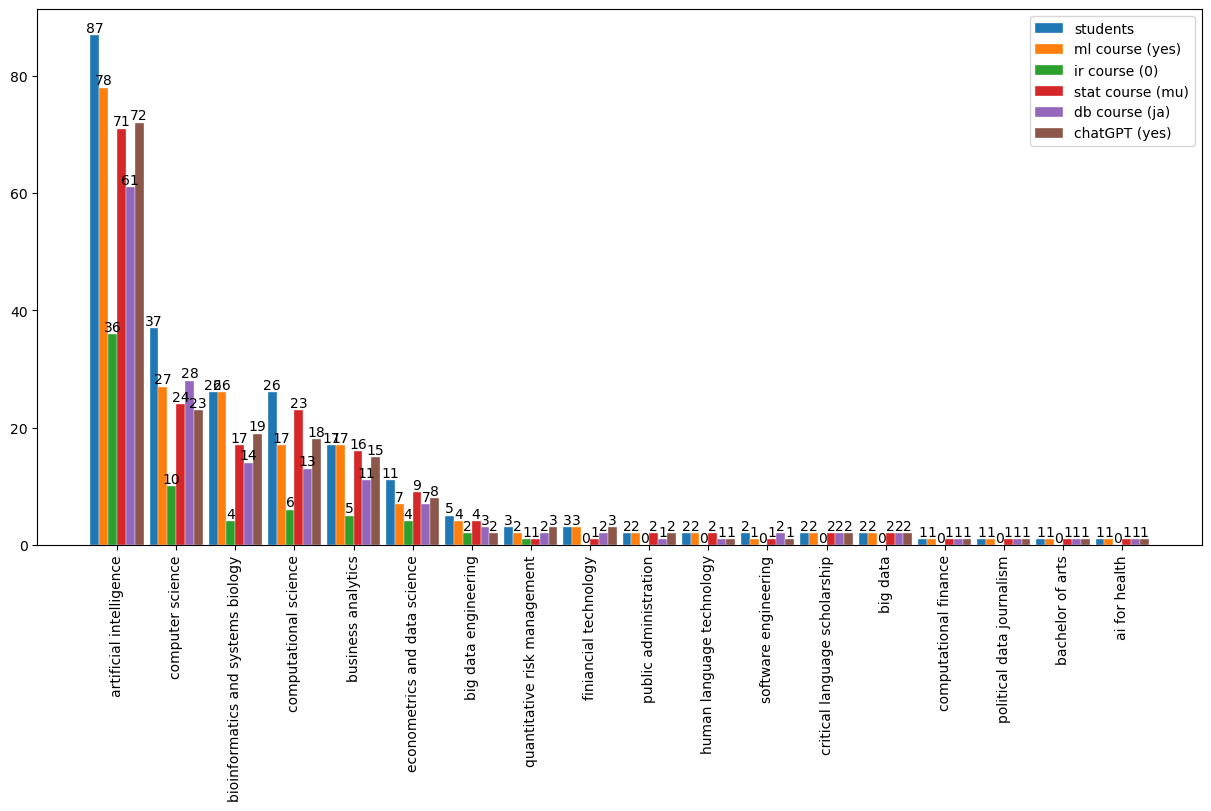

In [34]:
progfreq = dataset["programme"].value_counts()

progGrouped = dataset.groupby("programme", observed=True)
colfreqdic = {}
cols = ["mlcourse","ircourse","statcourse","dbcourse","chatGPT"]
indeces = [0,1,0,0,0]
for i in range(len(cols)):
    colfreqdic[cols[i]] = []
    catfreq = progGrouped[cols[i]].value_counts()
    for prog in progfreq.index:
        colfreqdic[cols[i]].append(catfreq[prog].iloc[indeces[i]])




for name in cols:
    print(dataset[name].value_counts())

x = np.arange(len(progfreq.index))

fig, ax = plt.subplots(figsize=(12,8), layout="constrained")
ax.set_xticks(x+0.375)

rect = ax.bar(x, progfreq.values, label="students", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.15, colfreqdic["mlcourse"], label="ml course (yes)", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.3, colfreqdic["ircourse"], label="ir course (1)", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.45, colfreqdic["statcourse"], label="stat course (mu)", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.6, colfreqdic["dbcourse"], label="db course (ja)", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)
rect = ax.bar(x+0.75, colfreqdic["chatGPT"], label="chatGPT (yes)", edgecolor="white", linewidth=0.25, width=0.15)
ax.bar_label(rect)

ax.set_xticklabels(progfreq.index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.legend()
plt.show()


/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


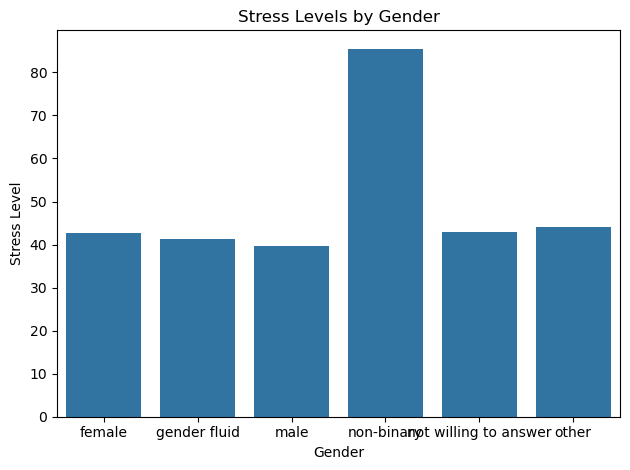

/tmp/ipykernel_958334/1442491550.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['sporthours'] = filtered_dataset['sporthours'].str.extract('(\d+)').astype(float).fillna(0).astype(int)


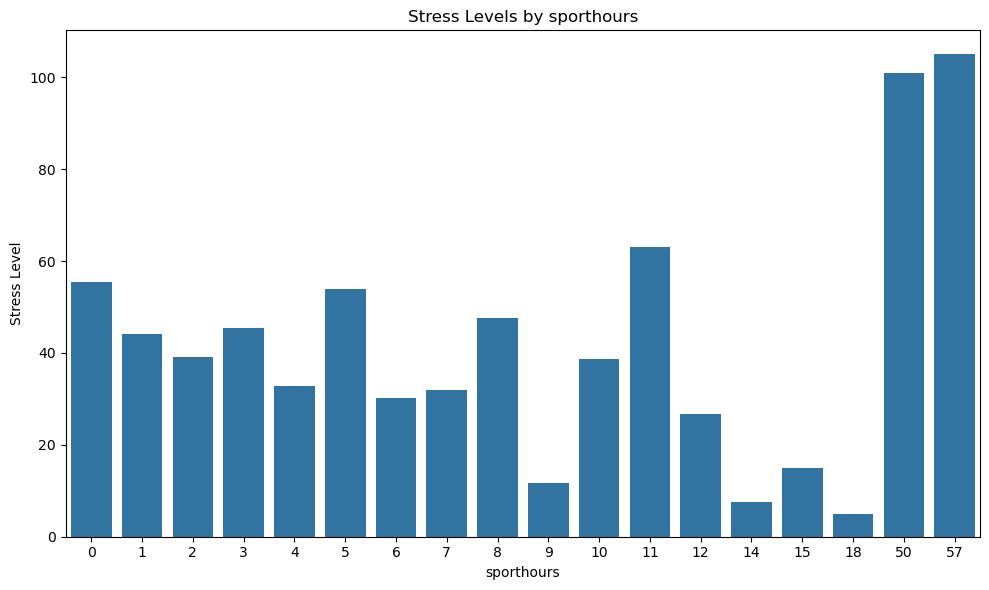

/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


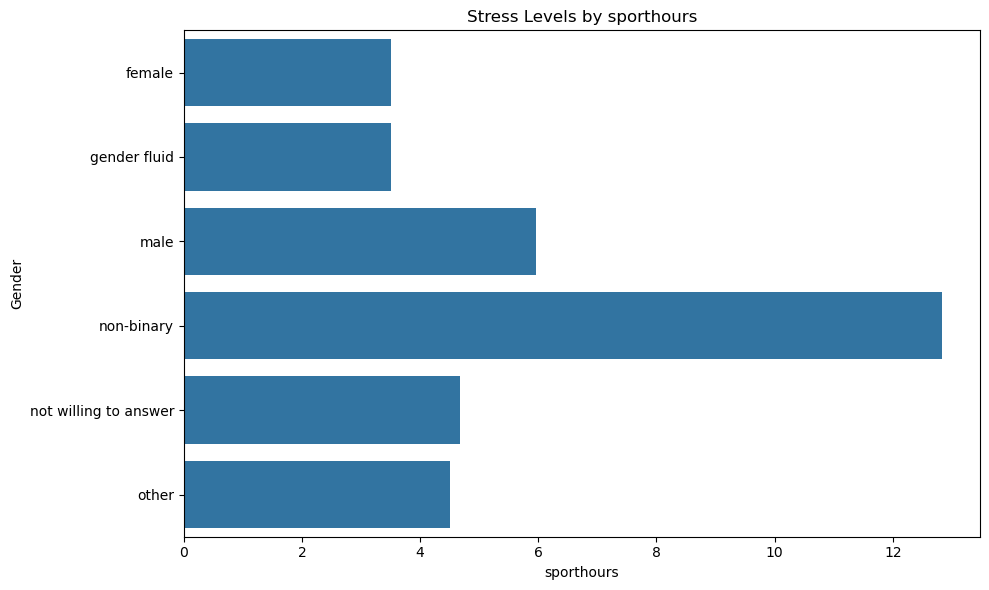

/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


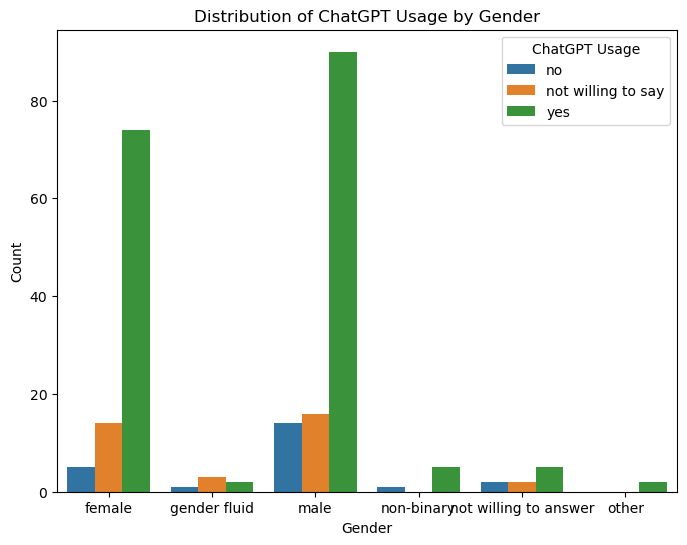

/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


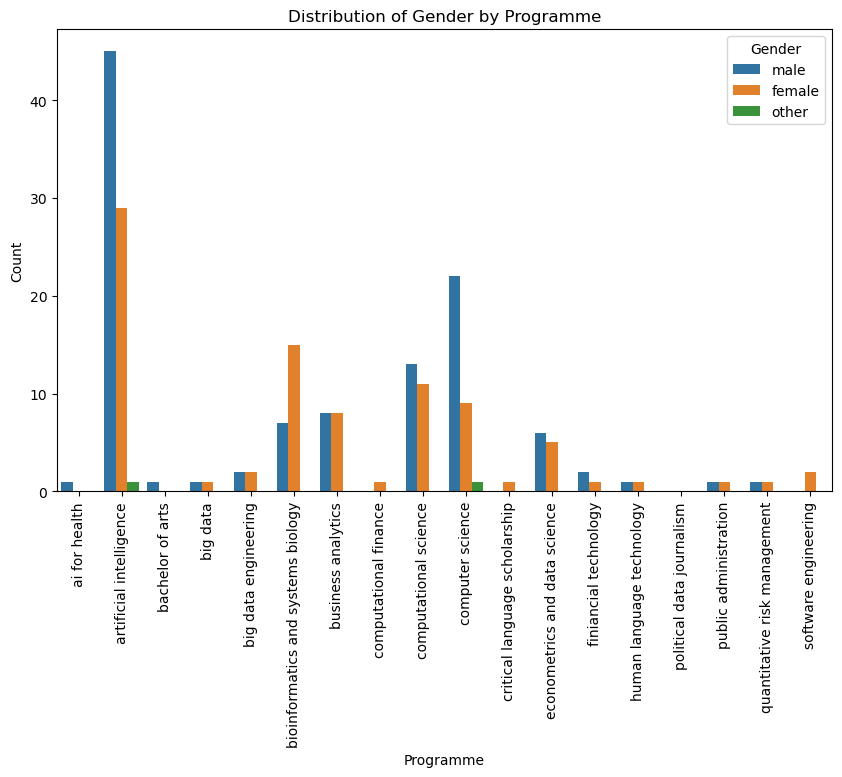

/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


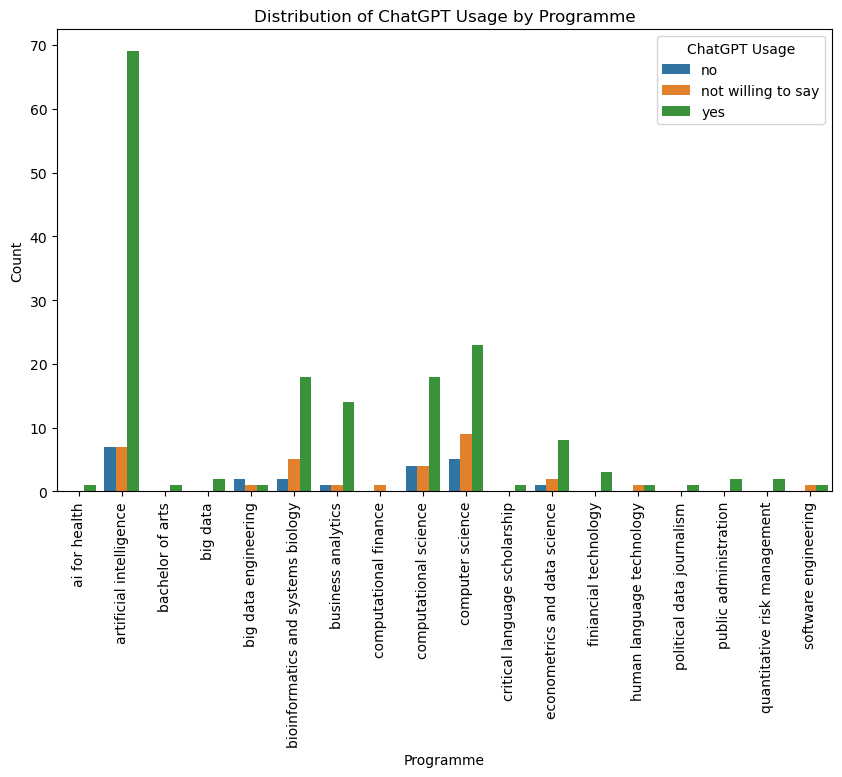

/tmp/ipykernel_958334/1442491550.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['studentestimate'] = pd.to_numeric(filtered_dataset['studentestimate'], errors='coerce').fillna(0)
/tmp/ipykernel_958334/1442491550.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['studentestimate_rounded'] = filtered_dataset['studentestimate'].apply(lambda x: round(x / 20) * 20)
/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: i

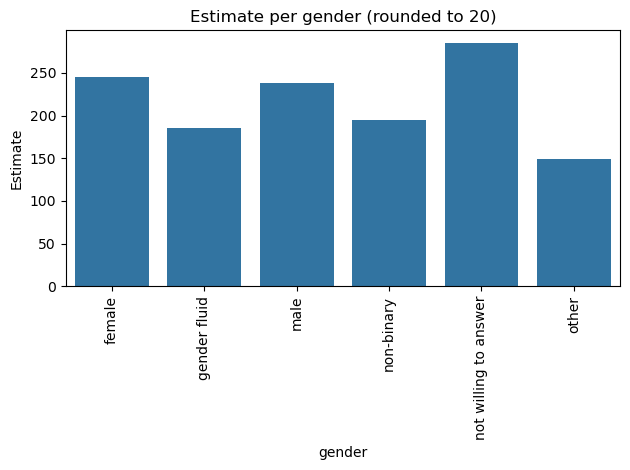

/home/grizzly/.local/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:595: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

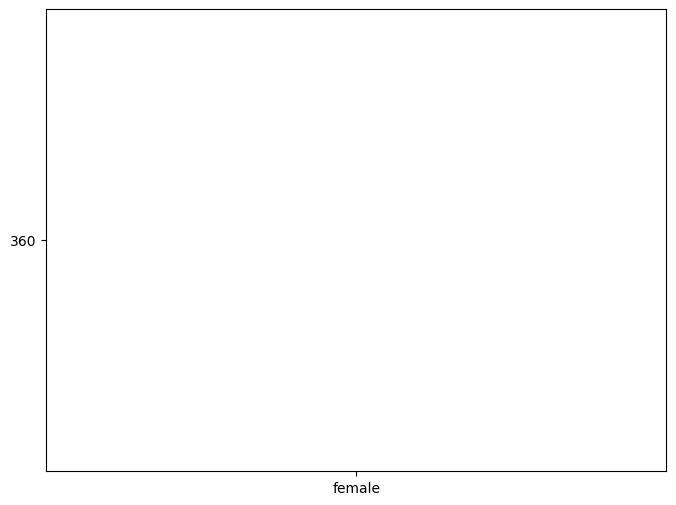

In [117]:
import seaborn as sns
#print(dataset.head())

def stress_outlier(dataset):
    #stress outlier removal
    Q1 = dataset['stress'].quantile(0.25)
    Q3 = dataset['stress'].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return dataset[(dataset['stress'] >= lower_bound) & (dataset['stress'] <= upper_bound)]

filtered_dataset = stress_outlier(dataset)


size=(10, 6)
sns.barplot(x='gender', y='stress', data=filtered_dataset, errorbar=None)
plt.title('Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

filtered_dataset['sporthours'] = filtered_dataset['sporthours'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
plt.figure(figsize=(10, 6))
sns.barplot(x='sporthours', y='stress', data=filtered_dataset, errorbar=None)
plt.title('Stress Levels by sporthours')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='sporthours', y='gender', data=filtered_dataset, errorbar=None)
plt.title('Stress Levels by sporthours')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

size=(10, 6)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='chatGPT', data=filtered_dataset)
plt.title('Distribution of ChatGPT Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='ChatGPT Usage', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='programme', hue='gender', data=filtered_dataset, hue_order=['male', 'female', 'other'])
plt.title('Distribution of Gender by Programme')
plt.xlabel('Programme')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender', loc='upper right')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='programme', hue='chatGPT', data=filtered_dataset)
plt.title('Distribution of ChatGPT Usage by Programme')
plt.xlabel('Programme')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='ChatGPT Usage', loc='upper right')
plt.show()


filtered_dataset['studentestimate'] = pd.to_numeric(filtered_dataset['studentestimate'], errors='coerce').fillna(0)
filtered_dataset['studentestimate_rounded'] = filtered_dataset['studentestimate'].apply(lambda x: round(x / 20) * 20)
outlier_threshold = 600
# Filter out row with 'studentestimate' values beyond the outlier threshold
filtered_dataset = filtered_dataset[filtered_dataset['studentestimate'] <= outlier_threshold]
sns.barplot(x='gender', y='studentestimate', data=filtered_dataset, errorbar=None)
plt.title('Estimate per gender (rounded to 20)')
plt.ylabel('Estimate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


